In [355]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/grekov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [356]:
# Определение набора положительных и отрицательных слов
positive_words = ['good', 'well', 'amazing', 'allow', 'successful', 'best']
negative_words = ['problem', 'broken', 'panic', 'bad', 'fake', 'confront', 'murder']

In [357]:
# Функция для присвоения метки настроения на основе наличия положительных или отрицательных слов
def get_sentiment(text):
    # Токенизация текста на отдельные слова
    words = nltk.word_tokenize(text.lower())
    # Подсчет количества положительных и отрицательных слов
    num_positive = sum([1 for word in words if word in positive_words])
    num_negative = sum([1 for word in words if word in negative_words])
    # Присвоение метки на основе чистой оценки настроения
    if num_positive > num_negative:
        return 'positive'
    elif num_negative > num_positive:
        return 'negative'
    else:
        return 'neutral'

In [358]:
# Тестирование функции
text1 = "Good explanation of how our most vulnerable kids are being sacrificed for others’ political gain"
text2 = "The problem is that the people who actually make the things that streaming platforms sell are tired of not being paid for it in a manner that allows them to keep doing it"
text3 = "Microsoft’s $69-billion acquisition of Activision Blizzard could provide the growing labor movement among video game workers a boost because of a labor neutrality agreement the company entered last year"
print(get_sentiment(text1))
print(get_sentiment(text2))
print(get_sentiment(text3))

positive
negative
neutral


In [359]:
# Загрузка датасета новостей
lanews = pd.read_csv('lanewsdataset.csv', engine='python', error_bad_lines=False)

/tmp/ipykernel_22293/2836717292.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  lanews = pd.read_csv('lanewsdataset.csv', engine='python', error_bad_lines=False)


In [360]:
lanews.head()

,LABEL,NEWS
0,Business,The studios created every problem they now fac...
1,Business,The problem is that the people who actually ma...
2,Business,The era of cheap streaming is OVER! Your month...
3,Business,The CWA says Microsoft’s acquisition of ABK is...
4,Business,The cheap streaming era is over. Here's why yo...


In [361]:
from textblob import TextBlob

In [362]:
# Определение функции для получения полярности настроения твита
def get_sentiment(lan):
    blob = TextBlob(lan)
    return blob.sentiment.polarity

In [363]:
# Применение функции к столбцу 'NEWS' датасета для получения полярности настроения каждой новости
lanews['sentiment'] = lanews['NEWS'].apply(get_sentiment)

In [364]:
lanews.head()

,LABEL,NEWS,sentiment
0,Business,The studios created every problem they now fac...,0.197917
1,Business,The problem is that the people who actually ma...,0.033333
2,Business,The era of cheap streaming is OVER! Your month...,0.250000
3,Business,The CWA says Microsoft’s acquisition of ABK is...,-0.400000
4,Business,The cheap streaming era is over. Here's why yo...,0.400000


In [365]:
# Определение функции для присвоения метки настроения на основе оценки полярности настроения
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

In [366]:
lanews.head()

,LABEL,NEWS,sentiment
0,Business,The studios created every problem they now fac...,0.197917
1,Business,The problem is that the people who actually ma...,0.033333
2,Business,The era of cheap streaming is OVER! Your month...,0.250000
3,Business,The CWA says Microsoft’s acquisition of ABK is...,-0.400000
4,Business,The cheap streaming era is over. Here's why yo...,0.400000


In [367]:
# Применение функции к столбцу 'sentiment' датасета для присвоения меток настроения
lanews['sentiment_label'] = lanews['sentiment'].apply(get_sentiment_label)

In [368]:
lanews.head()

,LABEL,NEWS,sentiment,sentiment_label
0,Business,The studios created every problem they now fac...,0.197917,positive
1,Business,The problem is that the people who actually ma...,0.033333,positive
2,Business,The era of cheap streaming is OVER! Your month...,0.250000,positive
3,Business,The CWA says Microsoft’s acquisition of ABK is...,-0.400000,negative
4,Business,The cheap streaming era is over. Here's why yo...,0.400000,positive


In [369]:
# Определение функции для присвоения метки на основе числового порога
def get_category(value):
    if value > 0.1:
        return 'high'
    elif value < 0.1:
        return 'low'
    else:
        return 'medium'

In [370]:
# Применение функции к столбцу данных
lanews['follow_category'] = lanews['sentiment'].apply(get_category)

In [371]:
lanews.head()

,LABEL,NEWS,sentiment,sentiment_label,follow_category
0,Business,The studios created every problem they now fac...,0.197917,positive,high
1,Business,The problem is that the people who actually ma...,0.033333,positive,low
2,Business,The era of cheap streaming is OVER! Your month...,0.250000,positive,high
3,Business,The CWA says Microsoft’s acquisition of ABK is...,-0.400000,negative,low
4,Business,The cheap streaming era is over. Here's why yo...,0.400000,positive,high


<Axes: >

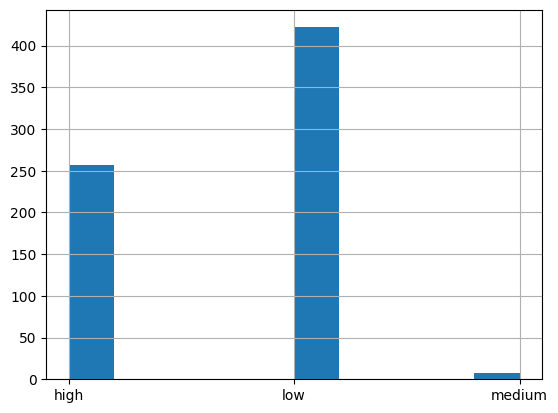

In [372]:
lanews['follow_category'].hist()

In [373]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [374]:
# Замена 'neg' на 0 и 'pos' на 1
lanews['sentiment_label'] = lanews['sentiment_label'].replace({'negative': 0, 'positive': 1, 'neutral' : 1})

In [375]:
lanews.head()

,LABEL,NEWS,sentiment,sentiment_label,follow_category
0,Business,The studios created every problem they now fac...,0.197917,1,high
1,Business,The problem is that the people who actually ma...,0.033333,1,low
2,Business,The era of cheap streaming is OVER! Your month...,0.250000,1,high
3,Business,The CWA says Microsoft’s acquisition of ABK is...,-0.400000,0,low
4,Business,The cheap streaming era is over. Here's why yo...,0.400000,1,high


<Axes: >

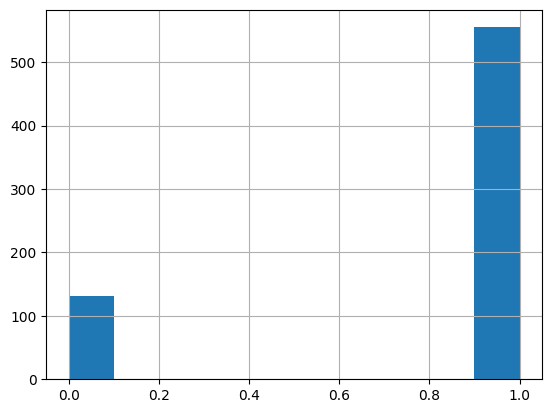

In [376]:
lanews['sentiment_label'].hist()

In [378]:
# Перемешивание данных
lanews = shuffle(lanews)

In [379]:
# Разделение датасета на размеченную и неразмеченную выборки
labeled_lanews, unlabeled_lanews = train_test_split(lanews, train_size=0.2, random_state=42)

In [380]:
labeled_lanews.head()

,LABEL,NEWS,sentiment,sentiment_label,follow_category
257,Food and Dining,Savoring L.A.'s Street Food: 23 Stands and Mar...,0.25,1,high
563,Social Issues,"“Conservatives wage a well-coordinated, anti- ...",0.00,1,low
222,Environment,California has some of the highest diversity o...,0.00,1,low
263,Food and Dining,Koreatown’s food scene has become one of the m...,0.40,1,high
498,Real Estate,Houston's flood zones to be redeveloped with e...,0.00,1,low


In [381]:
unlabeled_lanews.head()

,LABEL,NEWS,sentiment,sentiment_label,follow_category
238,Food and Dining,Exploring East L.A.: Discover 25 Must-Try Taco...,0.000000,1,low
49,Crime,Two dead in separate shootings at Halloween pa...,-0.100000,0,low
394,Opinion/Editorial,These California Republicans voted for Jim Jor...,0.700000,1,high
630,Sports,"After Saturday night, we can now all see — Lin...",0.266667,1,high
413,Politics,The latest installment in @sarahdwire’s Breaki...,0.500000,1,high


In [382]:
# Определение функции для обучения модели логистической регрессии на размеченных данных
def train_model(labeled_lanews):
    # Векторизация текстовых данных с помощью TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(labeled_lanews['NEWS'])
    y = labeled_lanews['sentiment_label']

    # Обучение модели логистической регрессии на размеченных данных
    model = LogisticRegression()
    model.fit(X, y)

    return model, vectorizer

In [383]:
# Обучение начальной модели на небольшом наборе 
model, vectorizer = train_model(labeled_lanews)

In [384]:
# Использование исходной модели для прогнозирования настроения неразмеченных данных
X_unlabeled = vectorizer.transform(unlabeled_lanews['NEWS'])
y_unlabeled_predicted = model.predict(X_unlabeled)

In [385]:
# Вычислить неопределенности или энтропии предсказаний
y_unlabeled_proba = model.predict_proba(X_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [386]:
# Выбор 100 наиболее неопределенных точек данных для маркировки человеком
labeled_lanews_new = unlabeled_lanews.iloc[uncertainty.argsort()[:100]]
unlabeled_lanews_new = unlabeled_lanews.iloc[uncertainty.argsort()[100:]]

In [387]:
# Разметка новых точек данных и добавление их к размеченному множеству
labeled_lanews = pd.concat([labeled_lanews, labeled_lanews_new])

In [388]:
# Переобучение модели на расширенном маркированном множестве
model, vectorizer = train_model(labeled_lanews)

In [389]:
lanews_test= pd.read_csv('lanews_test.csv', engine='python', error_bad_lines=False)

/tmp/ipykernel_22293/1439305956.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  lanews_test= pd.read_csv('lanews_test.csv', engine='python', error_bad_lines=False)


In [390]:
lanews_test.head()

,LABEL,NEWS,sentiment,sentiment_label,follow_category
0,Business,The studios created every problem they now fac...,0.197917,1,high
1,Business,The problem is that the people who actually ma...,0.033333,1,low
2,Business,The era of cheap streaming is OVER! Your month...,0.250000,1,high
3,Business,The CWA says Microsoft’s acquisition of ABK is...,-0.400000,0,low
4,Business,The cheap streaming era is over. Here's why yo...,0.400000,1,high


In [391]:
# Оценка модели на тестовом датасете
X_test = vectorizer.transform(lanews_test['NEWS'])
y_test_predicted = model.predict(X_test)
f1 = f1_score(lanews_test['sentiment_label'], y_test_predicted)

print(f1)

0.8944399677679291
